In [41]:
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import LabelEncoder

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
df = pd.read_csv("processed_batch_df_all_species.csv")

df.head()

,index,image,species,individual_id,0,1,2,3,4,5,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,aspect_ratio
0,0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,0.463753,0.469581,0.477523,0.487009,0.498406,0.511733,...,0.201963,0.192882,0.200069,0.197648,0.195564,0.196354,0.200686,0.199245,0.197579,1.198212
1,28,0029d877c29ab4.jpg,melon_headed_whale,c27f0a7f4e5a,0.939367,0.935021,0.931936,0.935014,0.935281,0.931487,...,0.283993,0.297922,0.278352,0.279591,0.300968,0.287639,0.279108,0.287371,0.322396,1.550824
2,33,0032f90c7732b0.jpg,melon_headed_whale,a21288153152,0.899138,0.909743,0.908199,0.911127,0.909184,0.903106,...,0.827001,0.839746,0.836978,0.845483,0.847763,0.841257,0.839941,0.824932,0.835354,1.319865
3,42,003ffd805a5910.jpg,melon_headed_whale,2842789d601d,0.343223,0.340872,0.346946,0.338741,0.341106,0.346864,...,0.208963,0.202183,0.245649,0.225798,0.198537,0.154678,0.146326,0.136733,0.134887,1.280255
4,69,0067205f90977d.jpg,melon_headed_whale,e50fcf9eefa8,0.624869,0.624869,0.624869,0.624942,0.625566,0.631068,...,0.093480,0.084922,0.071639,0.074852,0.088848,0.086409,0.083221,0.086121,0.091253,1.092199


In [3]:
df.describe()

,index,0,1,2,3,4,5,6,7,8,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,aspect_ratio
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2232.923077,0.662875,0.665244,0.666177,0.666539,0.666857,0.665708,0.664164,0.664744,0.665358,...,0.548107,0.548944,0.549670,0.550348,0.551633,0.555071,0.554402,0.554168,0.553697,1.799478
std,6177.142166,0.223140,0.221845,0.220573,0.219601,0.219803,0.219109,0.219096,0.218400,0.217892,...,0.232382,0.232770,0.233170,0.233167,0.232248,0.232532,0.233683,0.233982,0.232591,0.958989
min,0.000000,0.011520,0.011585,0.011646,0.011580,0.011845,0.011645,0.011599,0.011612,0.011560,...,0.011634,0.011556,0.011634,0.011606,0.011380,0.012193,0.012616,0.012520,0.011990,0.682016
25%,100.500000,0.508431,0.521933,0.518492,0.523304,0.513798,0.502200,0.514149,0.517680,0.519344,...,0.358329,0.361276,0.365240,0.373494,0.373306,0.371066,0.371320,0.373566,0.371210,1.494042
50%,334.500000,0.684289,0.678763,0.680707,0.680352,0.683535,0.682215,0.679084,0.675447,0.677285,...,0.547216,0.547445,0.552323,0.548373,0.554543,0.558880,0.557013,0.559169,0.562058,1.500208
75%,1496.500000,0.846823,0.850837,0.842882,0.848363,0.851379,0.841670,0.838528,0.843665,0.842767,...,0.739594,0.745353,0.734414,0.738327,0.733173,0.747863,0.730675,0.737087,0.733200,1.752845
max,46093.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.032258


In [4]:
df.shape

(364, 65541)

In [5]:
dff = pd.read_csv("processed_batch_sampled_df_random_state_0.csv")

In [6]:
dff.shape

(40, 65541)

In [7]:
features =  df.drop(columns=['index', 'image','species','individual_id','aspect_ratio'])

In [8]:
features.shape

(364, 65536)

In [9]:
features.to_csv('features.csv')

In [10]:
labels = df['species']

In [11]:
labels.to_csv('labels.csv')

In [12]:
print(len(labels.unique()))
print(labels.unique())

26
['melon_headed_whale' 'humpback_whale' 'false_killer_whale'
 'bottlenose_dolphin' 'beluga' 'minke_whale' 'fin_whale' 'blue_whale'
 'gray_whale' 'southern_right_whale' 'common_dolphin' 'killer_whale'
 'short_finned_pilot_whale' 'dusky_dolphin' 'long_finned_pilot_whale'
 'sei_whale' 'spinner_dolphin' 'cuviers_beaked_whale' 'spotted_dolphin'
 'brydes_whale' 'commersons_dolphin' 'white_sided_dolphin'
 'rough_toothed_dolphin' 'pantropic_spotted_dolphin' 'pygmy_killer_whale'
 'frasiers_dolphin']


In [13]:
df2 = df.sample(frac = 1)

In [14]:
training_data, testing_data = train_test_split(df2, test_size=0.2, random_state=25)

In [15]:
train_features_shuffled = training_data.drop(columns=['index', 'image','species','individual_id','aspect_ratio'])
train_labels_shuffled = training_data['species']
train_ids_shuffled = training_data['individual_id']

train_labels_shuffled.to_csv('train_labels_shuffled.csv')
train_features_shuffled.to_csv('train_features_shuffled.csv')
train_ids_shuffled.to_csv('train_ids_shuffled.csv')

test_features_shuffled = testing_data.drop(columns=['index', 'image','species','individual_id','aspect_ratio'])
test_labels_shuffled = testing_data['species']
test_ids_shuffled = testing_data['individual_id']

test_labels_shuffled.to_csv('test_labels_shuffled.csv')
test_features_shuffled.to_csv('test_features_shuffled.csv')
test_ids_shuffled.to_csv('test_ids_shuffled')

In [16]:
def test_model_accuracy(model, train_features, train_labels, test_features, test_labels):
    
    model.fit(train_features, train_labels)
        
    # Predict using k = k_value
    y_predict = model.predict(test_features)
        
    # Get accuracy for each k_value
    return accuracy_score(test_labels, y_predict)*100

def test_cluster_accuracy(model, train_features, test_features):
    
    test_labels =  model.fit(test_features).predict(test_features)
    train_labels = model.fit(train_features).predict(train_features)
    model.fit(train_features)
        
    # Predict using k = k_value
    y_predict = model.predict(test_features)
        
    # Get accuracy for each k_value
    return accuracy_score(test_labels, y_predict)*100

def plot_scores(param_list, score_list, param_name, score_name, model_name):
    fig = plt.figure()
    fig.suptitle(model_name + " : " + score_name + " vs. Value of " + param_name)
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel("Value of " + param_name)
    ax.set_ylabel(score_name)
    ax.set_ylim(0,50)
    labels = list(map(str, param_list))
    ax.bar(labels, score_list)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

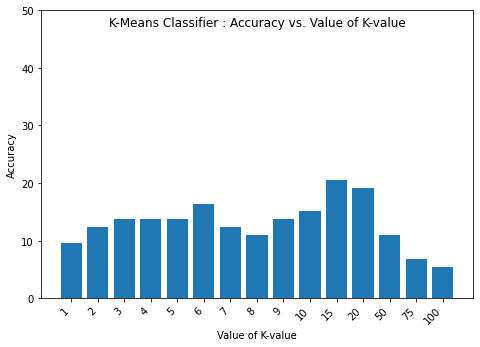

In [17]:
#  K-Nearest Neighbors model
knnmodel = KNeighborsClassifier(n_neighbors=1)

k_values = [1,2,3,4,5,6,7,8,9,10,15,20,50,75,100]
acc = list()

for i in range(len(k_values)):
    knnmodel = KNeighborsClassifier(n_neighbors=k_values[i])
    acc.append(test_model_accuracy(
        knnmodel,
        train_features_shuffled,
        train_labels_shuffled,
        test_features_shuffled,
        test_labels_shuffled
    ))


plot_scores(k_values, acc, "K-value", "Accuracy", "K-Means Classifier")

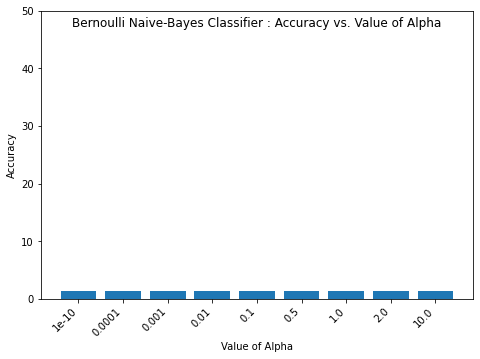

In [18]:
# Bernoulli Naive-Bayes
alpha_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
acc = list()


for i in range(len(alpha_list)):
    nbmodel = BernoulliNB(alpha=alpha_list[i])
    acc.append(test_model_accuracy(
        nbmodel,
        train_features_shuffled,
        train_labels_shuffled,
        test_features_shuffled,
        test_labels_shuffled
    ))

plot_scores(alpha_list, acc, "Alpha", "Accuracy", "Bernoulli Naive-Bayes Classifier")

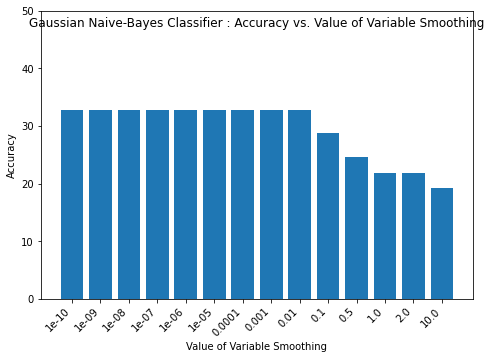

In [19]:
# Gaussian Naive-Bayes
var_smoothing_list = [1.0e-10, 1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 
                                0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
acc = list()

for i in range(len(var_smoothing_list)):
    gbmodel = GaussianNB(var_smoothing=var_smoothing_list[i])
    acc.append(test_model_accuracy(
        gbmodel,
        train_features_shuffled,
        train_labels_shuffled,
        test_features_shuffled,
        test_labels_shuffled
    ))


plot_scores(var_smoothing_list, acc, "Variable Smoothing", "Accuracy", "Gaussian Naive-Bayes Classifier")

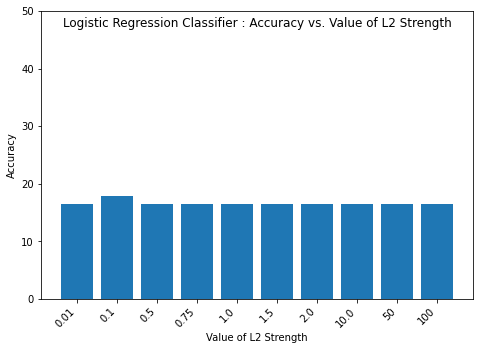

In [20]:
# LogisticRegression
c_list = [0.01, 0.1, 0.5, 0.75, 1.0,
              1.5, 2.0, 10.0, 50, 100]
acc = list()
    
for i in range(len(c_list)):
    lrmodel = LogisticRegression(C=c_list[i], solver="liblinear", multi_class="auto")
    acc.append(test_model_accuracy(
        lrmodel,
        train_features_shuffled,
        train_labels_shuffled,
        test_features_shuffled,
        test_labels_shuffled
    ))


plot_scores(c_list, acc, "L2 Strength", "Accuracy", "Logistic Regression Classifier")

In [21]:
# K-Means clustering
kmeans = KMeans(26, random_state=0)

print(test_cluster_accuracy(kmeans, train_features_shuffled, test_features_shuffled))

10.95890410958904


In [22]:
# Gaussian Mixture Model clustering
#gmm = GMM(n_components=26)

#print(test_cluster_accuracy(gmm, train_features_shuffled, test_features_shuffled))

In [48]:
# Nerual Network

def test_neural_network():
    model = Sequential()
    model.add(Dense(12, input_dim=65536, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model and calculate its accuracy:
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 

    # Print a summary of the Keras model:
    #model.summary()
    
    # Convert labels to integers
    
    le = LabelEncoder()
    train_labels = le.fit_transform(train_labels_shuffled)
    test_labels = le.fit_transform(test_labels_shuffled)
    
    model.fit(train_features_shuffled, train_labels, batch_size=32, epochs=150)

    y_predict = model.fit(test_features_shuffled)
    
    return accuracy_score(test_labels, y_predict)*100


print(test_neural_network())

Epoch 1/150
291/291 [==============================] - 0s 1ms/step - loss: 190.2693 - accuracy: 0.0309
Epoch 2/150
291/291 [==============================] - 0s 784us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 3/150
291/291 [==============================] - 0s 801us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 4/150
291/291 [==============================] - 0s 801us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 5/150
291/291 [==============================] - 0s 821us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 6/150
291/291 [==============================] - 0s 799us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 7/150
291/291 [==============================] - 0s 773us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 8/150
291/291 [==============================] - 0s 782us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 9/150
291/291 [==============================] - 0s 794us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 10/150
291/291 [==============================] - 0

291/291 [==============================] - 0s 785us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 79/150
291/291 [==============================] - 0s 787us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 80/150
291/291 [==============================] - 0s 799us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 81/150
291/291 [==============================] - 0s 799us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 82/150
291/291 [==============================] - 0s 785us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 83/150
291/291 [==============================] - 0s 770us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 84/150
291/291 [==============================] - 0s 775us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 85/150
291/291 [==============================] - 0s 777us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 86/150
291/291 [==============================] - 0s 804us/step - loss: 188.9656 - accuracy: 0.0309
Epoch 87/150
291/291 [==============================] - 0s 

IndexError: list index out of range